# Nettoyage des données

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
# Import librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Import du script pour recuperer les donnees
from scripts.int_api import get_data

df = get_data()

   consommation_profilee_ent_hta  soutirage_rte  temperature_reelle_lissee  \
0                      9842319.0   3.663986e+09                       10.3   
1                      9753744.0   3.508571e+09                       10.3   
2                     10097935.0   3.583818e+09                       10.3   
3                      9982813.0   3.555732e+09                       10.3   
4                     10188180.0   3.500023e+09                       10.3   

   consommation_telerelevee_btsup  consommation_telerelevee_residentielle  \
0                    3.837060e+09                             337762242.0   
1                    3.906590e+09                             341971621.0   
2                    3.947795e+09                             335499451.0   
3                    4.041599e+09                             340487958.0   
4                    4.050052e+09                             336589889.0   

   consommation_telerelevee_professionnelle  \
0                    

In [4]:
# Info sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   consommation_profilee_ent_hta             400 non-null    float64
 1   soutirage_rte                             400 non-null    float64
 2   temperature_reelle_lissee                 400 non-null    float64
 3   consommation_telerelevee_btsup            400 non-null    float64
 4   consommation_telerelevee_residentielle    400 non-null    float64
 5   consommation_telerelevee_professionnelle  400 non-null    float64
 6   production_profilee_photovoltaique        400 non-null    float64
 7   pseudo_rayonnement                        400 non-null    int64  
 8   consommation_profilee_pro                 400 non-null    float64
 9   production_photovoltaique                 400 non-null    float64
 10  pertes                                

In [5]:
# Conversion au format datetime
df['horodate'] = pd.to_datetime(df['horodate'])
df[['horodate']] # Pas de 15 minutes

,horodate
0,2025-03-28 22:45:00+00:00
1,2025-03-28 22:30:00+00:00
2,2025-03-28 22:15:00+00:00
3,2025-03-28 22:00:00+00:00
4,2025-03-28 21:45:00+00:00
...,...
395,2025-03-24 20:00:00+00:00
396,2025-03-24 19:45:00+00:00
397,2025-03-24 19:30:00+00:00
398,2025-03-24 19:15:00+00:00


In [6]:
# Création de variables temporelles
df['hour'] = df['horodate'].dt.hour
df['day'] = df['horodate'].dt.day
df['month'] = df['horodate'].dt.month
df['dayofweek'] = df['horodate'].dt.dayofweek
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

In [7]:
# Aucune valeurs manquantes
df.isnull().sum()

consommation_profilee_ent_hta               0
soutirage_rte                               0
temperature_reelle_lissee                   0
consommation_telerelevee_btsup              0
consommation_telerelevee_residentielle      0
consommation_telerelevee_professionnelle    0
production_profilee_photovoltaique          0
pseudo_rayonnement                          0
consommation_profilee_pro                   0
production_photovoltaique                   0
pertes                                      0
production_profilee_hydraulique             0
production_eolien                           0
consommation_profilee_ent_bt                0
production_profilee_cogeneration            0
consommation_telerelevee_hta                0
consommation_profilee_res                   0
soutirage_vers_autres_grd                   0
mois                                        0
production_autre                            0
production_cogeneration                     0
consommation_hta                  

In [8]:
# Tri chronologique
df = df.sort_values(by='horodate').reset_index(drop=True)
df

,consommation_profilee_ent_hta,soutirage_rte,temperature_reelle_lissee,consommation_telerelevee_btsup,consommation_telerelevee_residentielle,consommation_telerelevee_professionnelle,production_profilee_photovoltaique,pseudo_rayonnement,consommation_profilee_pro,production_photovoltaique,...,production_totale,production_profilee,production_profilee_aut,consommation_totale,temperature_normale_lissee,hour,day,month,dayofweek,is_weekend
0,10348146.0,1.045205e+09,11.3,4.504494e+09,365456786.0,16019121.0,61232.0,54,4.881920e+09,471963.0,...,5.169152e+09,3487901.0,1437920.0,4.228611e+10,9.6,19,24,3,0,0
1,10402023.0,1.052388e+09,11.3,4.376051e+09,355886783.0,15900377.0,59719.0,54,4.819494e+09,463987.0,...,5.175188e+09,3486388.0,1437920.0,4.140367e+10,0.0,19,24,3,0,0
2,10431957.0,1.088018e+09,11.2,4.271406e+09,346407127.0,15717526.0,60720.0,56,4.734637e+09,489642.0,...,5.226286e+09,3496249.0,1437920.0,4.064694e+10,9.5,19,24,3,0,0
3,10411105.0,1.092918e+09,11.2,4.184080e+09,338984392.0,15607733.0,63952.0,56,4.674675e+09,486867.0,...,5.227653e+09,3499481.0,1437920.0,3.991995e+10,0.0,19,24,3,0,0
4,10226036.0,1.094848e+09,11.1,4.100515e+09,338144088.0,13594824.0,146296.0,58,4.563205e+09,533995.0,...,5.243507e+09,3580835.0,1437920.0,3.951447e+10,9.3,20,24,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,10188180.0,3.500023e+09,10.3,4.050052e+09,336589889.0,12528562.0,57062.0,60,4.206722e+09,2200877.0,...,9.295041e+09,3395747.0,1519595.0,4.015080e+10,0.0,21,28,3,4,0
396,9982813.0,3.555732e+09,10.3,4.041599e+09,340487958.0,13192752.0,36814.0,61,4.034090e+09,2159887.0,...,9.351824e+09,3373341.0,1519595.0,4.002946e+10,9.6,22,28,3,4,0
397,10097935.0,3.583818e+09,10.3,3.947795e+09,335499451.0,13098268.0,29342.0,61,4.020695e+09,2091399.0,...,9.362258e+09,3365869.0,1519595.0,3.944197e+10,0.0,22,28,3,4,0
398,9753744.0,3.508571e+09,10.3,3.906590e+09,341971621.0,13093172.0,31882.0,62,3.966919e+09,1966021.0,...,9.372708e+09,3369302.0,1519595.0,3.985193e+10,9.6,22,28,3,4,0


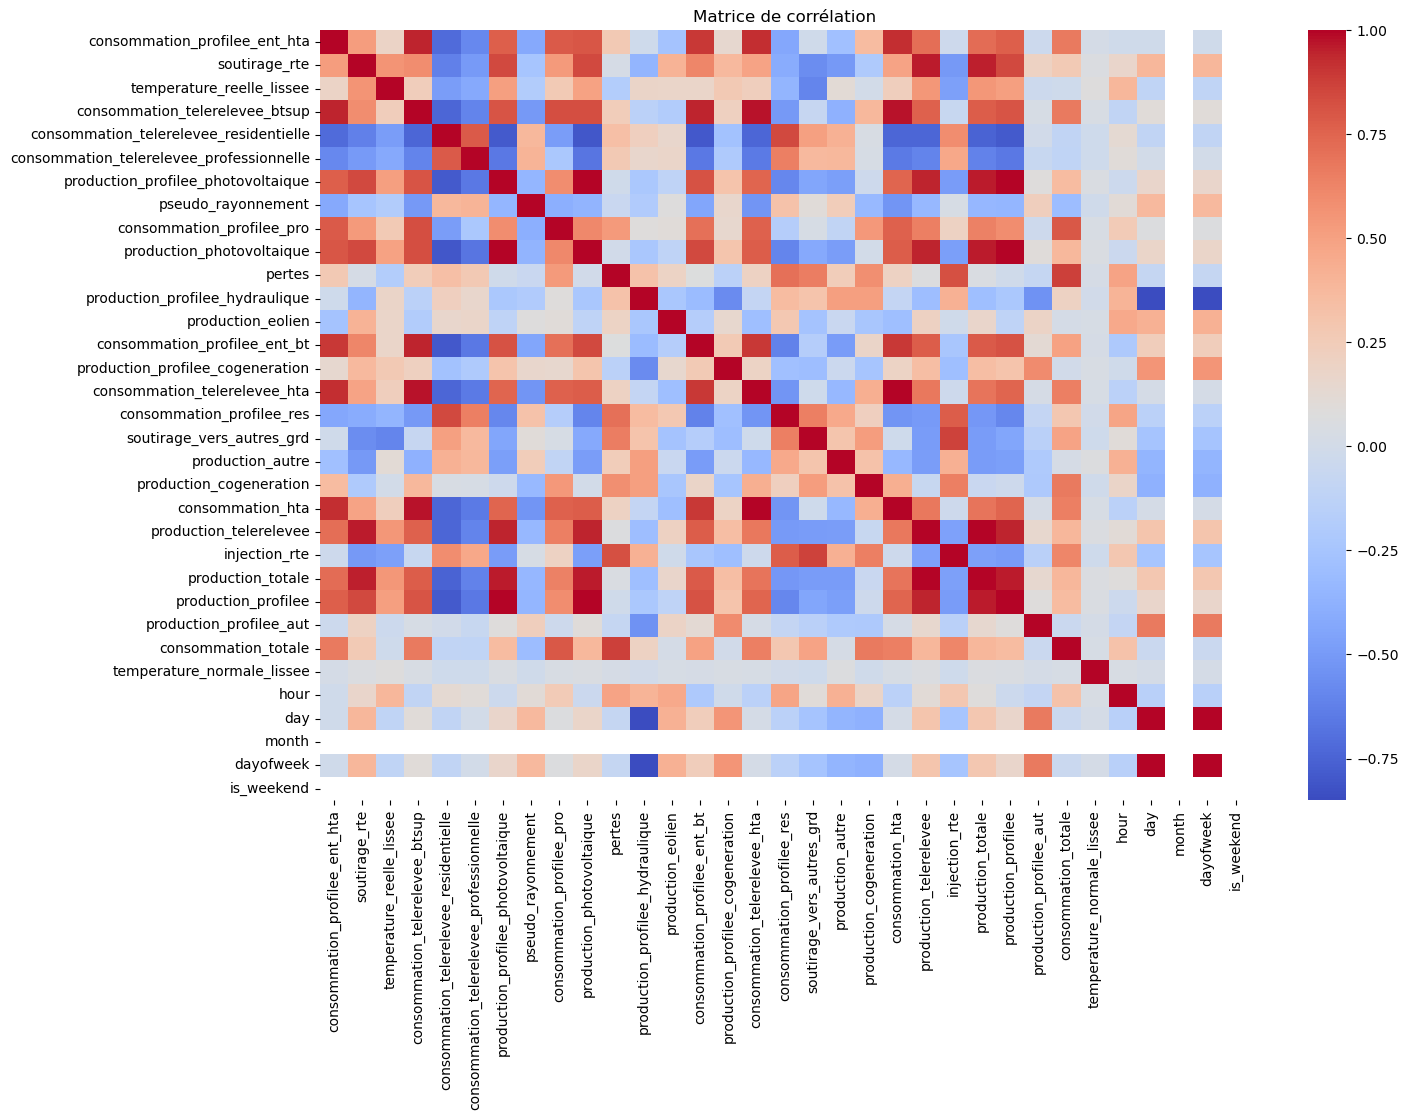

In [9]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Matrice de corrélation")
plt.show()

In [10]:
# Selection des variables d'interet
inter = [
    "consommation_totale", "production_totale", "temperature_reelle_lissee",
    "pseudo_rayonnement", "production_photovoltaique", "production_eolien",
    "hour", "dayofweek", "is_weekend","temperature_normale_lissee",
]

# 10 variables
df_inter = df[inter].copy()

In [13]:
# Conversion des colonnes temporelles en categories
df_inter['hour'] = df_inter['hour'].astype('category')
df_inter['dayofweek'] = df_inter['dayofweek'].astype('category')
df_inter['is_weekend'] = df_inter['is_weekend'].astype('category')

In [14]:
print(df_inter.head())

   consommation_totale  production_totale  temperature_reelle_lissee  \
0         4.228611e+10       5.169152e+09                       11.3   
1         4.140367e+10       5.175188e+09                       11.3   
2         4.064694e+10       5.226286e+09                       11.2   
3         3.991995e+10       5.227653e+09                       11.2   
4         3.951447e+10       5.243507e+09                       11.1   

   pseudo_rayonnement  production_photovoltaique  production_eolien hour  \
0                  54                   471963.0       2.486555e+09   19   
1                  54                   463987.0       2.514713e+09   19   
2                  56                   489642.0       2.560329e+09   19   
3                  56                   486867.0       2.573167e+09   19   
4                  58                   533995.0       2.581991e+09   20   

  dayofweek is_weekend  temperature_normale_lissee  
0         0          0                         9.6  
1   